# About NumPy

* Python extensions to handle large arrays of the same data types.
 * Vectors
 * Matrices
 * ...
  
* Normal data structures in Python are flexible, but too slow for numeric operations.

# Using NumPy

NumPy is imported according to the following convention.

In [2]:
import numpy as np

The reason don't import **numpy**, but import **np**, is to avoid writing **numpy.** before each every numpy function. It is also not recommended to use **from** to import NumPy as it may conflict with other features of Python.

# Array object

The array object is the main data type in NumPy. For efficient numerical operations, all array objects are allocated as continuous blocks of values in memory.

## Create array objects

New array objects can be created using the **np.array()** function. The first argument contains a list or a nested list of values. The last argument specifies the data type of the array.

In [3]:
a = np.array([1, 2, 3], float)
print(a)

[1. 2. 3.]


If no data type is specified, NumPy will determine the data type depending on what is specified as input to the function.

In [4]:
a = np.array([1, 2, 3])
print(a)

[1 2 3]


In [5]:
a = np.array([1.0, 2.0, 3.0])
print(a)

[1. 2. 3.]


Compared to lists, array objects can only contain values ​​of the same type.

### Multidimensional arrays

Multidimensional arrays can be created by specifying nested lists in the **np.array ()** function.

In [6]:
a = np.array([[1,2],[3,4]])
print(a)

b = np.array([[1,2,3,4],[5,6,7,8]], float)
print(b)

[[1 2]
 [3 4]]
[[1. 2. 3. 4.]
 [5. 6. 7. 8.]]


## Using arrays

Arrays are always stored as 1-dimensional blocks of values in memory. Array dimensions are really just a way to access different positions in the 1-dimensional block.

NumPy stores arrays in memory row-wise, which also how C and C++ store two-dimensional arrays. Fortran stores arrays column by column. The following figure shows how this happens in memory:

![variable references 1](https://github.com/jonaslindemann/guide_to_python/blob/master/chapters/kapitel5/notebooks/images/array1.png?raw=1)

### Array information

There are several ways to query information about array objects. One of the more important properties is the shape of the array object, which can be obtained through the **.shape** properties.

In [7]:
a = np.array([1,2,3,4])
b = np.array([[1,2],[3,4]])
c = np.array([[[1,2,3,4],
               [5,6,7,8]],
              [[1,2,3,4],
               [5,6,7,8]]],float)

print(a.shape)
print(b.shape)
print(c.shape)

(4,)
(2, 2)
(2, 2, 4)


For two-dimensional array objects, the number of rows and columns can be assigned to variables using the following code:

In [8]:
r, c = b.shape
print(r, c)

2 2


The number of dimensions for an array object is queried by the **.ndim** property

In [9]:
print(b.ndim)

2


There are several other properties that can be queried. Some of these are shown in the following example:

In [10]:
b = np.array([[1,2],[3,4]])
print("array shape =", b.shape) # Size
print("array ndim =", b.ndim)   # Number of dimensions
print("array dtype =", b.dtype) # Data type
print("array size =", b.size)   # Number of elements in the array
print("array itemsize =", b.itemsize) # Size of an element in bytes

array shape = (2, 2)
array ndim = 2
array dtype = int32
array size = 4
array itemsize = 4


### Change the shape of an array

The **.reshape()** method can be used to change the shape of an array. As long as the number of values in an array is not changed, NumPy will not reallocate the memory for the array. To verify this, we first define a function that returns the array object's memory address:

In [11]:
def memory_of(a):
    return a.__array_interface__["data"][0]

In the following example, we change the shape of an array object and examine whether memory allocation changes through it.

In [12]:
a = np.array([[1,2],[3,4]])

print(a)
print(memory_of(a))

a_flat = np.reshape(a, [4,1])

print(a_flat)
print(memory_of(a_flat))

[[1 2]
 [3 4]]
2445935316624
[[1]
 [2]
 [3]
 [4]]
2445935316624


Here we can see that the memory of the array objects is not changed and both __a__ and **a_flat** point to the same memory location.

Changing values in __a__ will also change values in **a_flat**.

In [13]:
a[0,0] = 42

print(a)
print(a_flat)

[[42  2]
 [ 3  4]]
[[42]
 [ 2]
 [ 3]
 [ 4]]


If you don't want this behavior when making array assignments, you must use the **.copy()** method to create a copy of the array object.

In [14]:
c = a.copy()
c[0,0] = 84

print(a)
print(memory_of(a))

print(c)
print(memory_of(c))

[[42  2]
 [ 3  4]]
2445935316624
[[84  2]
 [ 3  4]]
2445935315056


Now, __c__ does not refer to the same memory address as **a**.

More examples:

In [15]:
b = np.array([[1,2,3,4],[5,6,7,8]], float)
print(b)

b_shaped = np.reshape(b, [8,])
print(b_shaped)

b_shaped = np.reshape(b, [4,2])
print(b_shaped)

# **Please note** this is not the same as:
b_trans = np.transpose(b)
print(b_trans)

[[1. 2. 3. 4.]
 [5. 6. 7. 8.]]
[1. 2. 3. 4. 5. 6. 7. 8.]
[[1. 2.]
 [3. 4.]
 [5. 6.]
 [7. 8.]]
[[1. 5.]
 [2. 6.]
 [3. 7.]
 [4. 8.]]


### Change the size of an array

The **.resize()** method is used to resize an already existing array object. Existing value will be retained to the extent possible. New values will be populated with values from the previous array object.

In [16]:
base = np.array([[1,2],[3,4]])
print(base)

big = np.resize(base, [9,9])
print(big)

big = np.resize(base, [4,4])
print(big)

big = np.resize(base, [4,2])
print(big)

[[1 2]
 [3 4]]
[[1 2 3 4 1 2 3 4 1]
 [2 3 4 1 2 3 4 1 2]
 [3 4 1 2 3 4 1 2 3]
 [4 1 2 3 4 1 2 3 4]
 [1 2 3 4 1 2 3 4 1]
 [2 3 4 1 2 3 4 1 2]
 [3 4 1 2 3 4 1 2 3]
 [4 1 2 3 4 1 2 3 4]
 [1 2 3 4 1 2 3 4 1]]
[[1 2 3 4]
 [1 2 3 4]
 [1 2 3 4]
 [1 2 3 4]]
[[1 2]
 [3 4]
 [1 2]
 [3 4]]


## Functions for creating array objects

In many cases, it is impossible to create arrays using the **np.array()** function. To create larger arrays, NumPy includes a number of features for creating different types of arrays of different sizes.

### Arrays filled with zeros

A common type of array object is an arrays filled with zeros. These can be created with the **np.zeros()** function. The function takes the shape of the array object to be created as an argument and an argument for the data type.

In [17]:
a = np.zeros([4,4])
print(a)

[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]


In [18]:
b = np.zeros([4,4], int)
print(b)

[[0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]]


### Array objects consisting of ones

Arrays containing ones are created in a similar way with the function **np.ones()**.

In [19]:
c = np.ones([5,10], float)
print(c)

[[1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]]


It is also possible to create arrays with a specific value using **np.ones()**:

In [20]:
c = np.ones([5,10], float) * 42.0
print(c)

[[42. 42. 42. 42. 42. 42. 42. 42. 42. 42.]
 [42. 42. 42. 42. 42. 42. 42. 42. 42. 42.]
 [42. 42. 42. 42. 42. 42. 42. 42. 42. 42.]
 [42. 42. 42. 42. 42. 42. 42. 42. 42. 42.]
 [42. 42. 42. 42. 42. 42. 42. 42. 42. 42.]]


### Array ranges

In many applications, there is a need to create array objects with ranges of numeric values. This can be acomplished with the **np.arange()** function, which is similar to the standard python function **range()**. An array of 10 elements and values from 0 to 9 is created with:

In [21]:
a = np.arange(10)
print(a)

[0 1 2 3 4 5 6 7 8 9]


By combining **np.arange()** with **np.reshape()**, it is possible to create different array objects filled with value ranges:

In [22]:
b = np.reshape(np.arange(100), [10,10])
print(b)

[[ 0  1  2  3  4  5  6  7  8  9]
 [10 11 12 13 14 15 16 17 18 19]
 [20 21 22 23 24 25 26 27 28 29]
 [30 31 32 33 34 35 36 37 38 39]
 [40 41 42 43 44 45 46 47 48 49]
 [50 51 52 53 54 55 56 57 58 59]
 [60 61 62 63 64 65 66 67 68 69]
 [70 71 72 73 74 75 76 77 78 79]
 [80 81 82 83 84 85 86 87 88 89]
 [90 91 92 93 94 95 96 97 98 99]]


It is possible to give start, end and step lengths just like the **range()** function

In [23]:
a = np.arange(-10,10)
print(a)

a = np.arange(-10,10,2)
print(a)

[-10  -9  -8  -7  -6  -5  -4  -3  -2  -1   0   1   2   3   4   5   6   7
   8   9]
[-10  -8  -6  -4  -2   0   2   4   6   8]


As with **np.array()**, it is also possible to specify the data type for the range array.

In [24]:
a = np.arange(-10,10,2, dtype=float)
print(a)

[-10.  -8.  -6.  -4.  -2.   0.   2.   4.   6.   8.]


### Identity Arrays

Another common array type is the identity array, which is easily be created with the **np.identity()** function. The function takes the size as input and an optional argument for the data type.

In [25]:
i = np.identity(10)
print(i)

[[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]


### Array objects with linear variation

**np.arange()** works best if the range is integer. If you need a more precise range, it is better to use the **np.linspace()** function. The function takes the start, end value and number of values as input. The values between start and end are interpolated by the function.

In [26]:
x = np.linspace(0,1.0,10)
print(x)

x = np.linspace(0,1.0,20)
print(x)

[0.         0.11111111 0.22222222 0.33333333 0.44444444 0.55555556
 0.66666667 0.77777778 0.88888889 1.        ]
[0.         0.05263158 0.10526316 0.15789474 0.21052632 0.26315789
 0.31578947 0.36842105 0.42105263 0.47368421 0.52631579 0.57894737
 0.63157895 0.68421053 0.73684211 0.78947368 0.84210526 0.89473684
 0.94736842 1.        ]


# Array expressions

All Python operators can be used with arrays. All operations are performed elementwise on the values in the array object.

In [27]:
a = np.arange(25).reshape([5,5])
print(a)

[[ 0  1  2  3  4]
 [ 5  6  7  8  9]
 [10 11 12 13 14]
 [15 16 17 18 19]
 [20 21 22 23 24]]


Elemental addition:

In [28]:
print(a+3)

[[ 3  4  5  6  7]
 [ 8  9 10 11 12]
 [13 14 15 16 17]
 [18 19 20 21 22]
 [23 24 25 26 27]]


Elemental Multiplication:

In [29]:
print(a*3)

[[ 0  3  6  9 12]
 [15 18 21 24 27]
 [30 33 36 39 42]
 [45 48 51 54 57]
 [60 63 66 69 72]]


You can also use the usual math functions on array objects:

In [30]:
print(np.sin(a))

[[ 0.          0.84147098  0.90929743  0.14112001 -0.7568025 ]
 [-0.95892427 -0.2794155   0.6569866   0.98935825  0.41211849]
 [-0.54402111 -0.99999021 -0.53657292  0.42016704  0.99060736]
 [ 0.65028784 -0.28790332 -0.96139749 -0.75098725  0.14987721]
 [ 0.91294525  0.83665564 -0.00885131 -0.8462204  -0.90557836]]


Negation:

In [31]:
print(-a)

[[  0  -1  -2  -3  -4]
 [ -5  -6  -7  -8  -9]
 [-10 -11 -12 -13 -14]
 [-15 -16 -17 -18 -19]
 [-20 -21 -22 -23 -24]]


You can also use operators on array objects:

In [32]:
print(a+a)

[[ 0  2  4  6  8]
 [10 12 14 16 18]
 [20 22 24 26 28]
 [30 32 34 36 38]
 [40 42 44 46 48]]


The array sizes do not have to be the same. The operations on the smaller array will be repeated on the larger array:

In [33]:
a = np.array([1,2,3]) 
b = np.ones([5,3])
print(a)
print(b)
print(a+b)

[1 2 3]
[[1. 1. 1.]
 [1. 1. 1.]
 [1. 1. 1.]
 [1. 1. 1.]
 [1. 1. 1.]]
[[2. 3. 4.]
 [2. 3. 4.]
 [2. 3. 4.]
 [2. 3. 4.]
 [2. 3. 4.]]


## Matrix Multiplication

**\*** operatorn för arrayer är ekvivalent till elementvis multiplikation. För att utföra en matrismultiplikation används istället funktionen **.dot()** eller **@**-operatorn.


The __*__ array operator is equivalent to elemental multiplication. To perform a matrix multiplication, the **.dot()** or **@** operator is used instead.

In [34]:
a = np.reshape(np.arange(16), [4,4])
print(a)
print(a.dot(a))
print(a @ a)

[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]
 [12 13 14 15]]
[[ 56  62  68  74]
 [152 174 196 218]
 [248 286 324 362]
 [344 398 452 506]]
[[ 56  62  68  74]
 [152 174 196 218]
 [248 286 324 362]
 [344 398 452 506]]


# Slices or sub-arrays

Reaching specific elements in an array is used by Python's normal index operator **[]**

In [35]:
a = np.arange(25)
print(a)
print(a[2])

b = np.arange(25).reshape([5,5])

print(b)
print(b[1,2])

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24]
2
[[ 0  1  2  3  4]
 [ 5  6  7  8  9]
 [10 11 12 13 14]
 [15 16 17 18 19]
 [20 21 22 23 24]]
7


Assignment of value in an array is done in the same way:

In [36]:
a[2] = 42
b[1,2] = 42

print(a)
print(b)

[ 0  1 42  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24]
[[ 0  1  2  3  4]
 [ 5  6 42  8  9]
 [10 11 12 13 14]
 [15 16 17 18 19]
 [20 21 22 23 24]]


Det är också möjligt att referera till delområden. Notationen beskrivs i följande punkter:

* a[start:slut] - värden mellan*start* och *slut-1*
* a[start:] - värden mellan *start* to the *slut*
* a[:slut] - värden upp till *slut-1*
* a[:] - Alla värden

It is also possible to refer to sub-arrays or slices. The notation is described in the following points:

* a [start:end] - values between *start* and *end-1* 
* a [start:] - values between *start* to the *end*
* a [:end] - values up to *end-1*
* a [:] - All values

In [54]:
a = np.arange(25)
print(a[1:5])

[1 2 3 4]


In most cases, NumPy tries to re-use allocated memory when creating sub-arrays or slices, but it is not always possible, which is illustrated in the following example:

In [55]:
a = np.arange(25)

print(a)
print(memory_of(a))
print(a.data)

b = a[1:5]

print(b)
print(memory_of(b))
print(b.data)

b[0] = 42

print(a)
print(b)

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24]
2445938574896
[1 2 3 4]
2445938574900
[ 0 42  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24]
[42  2  3  4]


More examples of sub-areas:

In [56]:
a = np.arange(16)

print(a)
print(a[:-1])    # All elements except the last
print(a[:-2])    # All elements except the last 2
print(a[-1])     # Last element of a
print(a[4:10:2]) # Elements 4 till 9 with a step of 2
print(a[::-1])   # All elements i a in reversed order

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15]
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14]
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13]
15
[4 6 8]
[15 14 13 12 11 10  9  8  7  6  5  4  3  2  1  0]


Sub arrays and slices can be used in multidimensional arrays as well:

In [57]:
b = np.reshape(a, (4,4))

print(b)
print(b[:,0])   # All rows in column 0
print(b[:,0:2]) # All rows in column 0 and 1
print(b[0,:])   # Rows 0
print(b[0:2,:]) # Rows 0 to 1
print(b[-1,:])  # Last row in b
print(b[:,-1])  # Last column in b
print(b[::2,:]) # Every other row in b
print(b[:,::2]) # Every other column in b

[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]
 [12 13 14 15]]
[ 0  4  8 12]
[[ 0  1]
 [ 4  5]
 [ 8  9]
 [12 13]]
[0 1 2 3]
[[0 1 2 3]
 [4 5 6 7]]
[12 13 14 15]
[ 3  7 11 15]
[[ 0  1  2  3]
 [ 8  9 10 11]]
[[ 0  2]
 [ 4  6]
 [ 8 10]
 [12 14]]


It is also possible to mix array objects and lists when creating array objects:

In [58]:
b[1] = [42,42,42,42]

In [59]:
b[:,2] = [42,42,42,42]

In [60]:
print(b)

[[ 0  1 42  3]
 [42 42 42 42]
 [ 8  9 42 11]
 [12 13 42 15]]


# Array methods

There are a number of features that can be important when working with array objects:

## Calculate the sum of values ​​in arrays

The **.sum()** method can be used to calculate the sum of arrays in different ways:

In [61]:
a = np.arange(36).reshape(6,6)

print(a)
print(a.sum())

[[ 0  1  2  3  4  5]
 [ 6  7  8  9 10 11]
 [12 13 14 15 16 17]
 [18 19 20 21 22 23]
 [24 25 26 27 28 29]
 [30 31 32 33 34 35]]
630


In [62]:
print(a.sum(0)) # Summera kolumner
print(a.sum(1)) # Summera rader

[ 90  96 102 108 114 120]
[ 15  51  87 123 159 195]


## Calculate the product of an array

The **.prod()** method can be used in the same way as **.sum()**, but instead calculates the product of the values in the array.

In [63]:
a = np.arange(1,37,dtype=float).reshape(6,6)
print(a)

[[ 1.  2.  3.  4.  5.  6.]
 [ 7.  8.  9. 10. 11. 12.]
 [13. 14. 15. 16. 17. 18.]
 [19. 20. 21. 22. 23. 24.]
 [25. 26. 27. 28. 29. 30.]
 [31. 32. 33. 34. 35. 36.]]


In [65]:
print(a.prod(0)) # The product of the columns
print(a.prod(1)) # The product of the rows

[ 1339975.  3727360.  7577955. 13404160. 21827575. 33592320.]
[7.20000000e+02 6.65280000e+05 1.33660800e+07 9.69091200e+07
 4.27518000e+08 1.40241024e+09]


# Matrix Objects (Matrix)

NumPy also contains special data types for handling matrices according to the mathematical definition. Matrices are created by using the **np.matrix** class, which inherits its functionality from the array class. The class implements many common operations in linear algebra.

In [66]:
A = np.matrix( [[1,2,3],[11,12,13],[21,22,23]])
x = np.matrix( [[1],[2],[3]] )
y = np.matrix( [[1,2,3]] )

print(A)
print(x)
print(y)
print(A.T) # Matrix transpose
print(A*x) # Matrix mulitply A * x
print(A.I) # Matrix inverse

[[ 1  2  3]
 [11 12 13]
 [21 22 23]]
[[1]
 [2]
 [3]]
[[1 2 3]]
[[ 1 11 21]
 [ 2 12 22]
 [ 3 13 23]]
[[ 14]
 [ 74]
 [134]]
[[ 2.92803691e+14 -5.85607382e+14  2.92803691e+14]
 [-5.85607382e+14  1.17121476e+15 -5.85607382e+14]
 [ 2.92803691e+14 -5.85607382e+14  2.92803691e+14]]


# Reading and writing arrays

NumPy has many ways to handle the writing and reading of array objects:

* Write arrays in NumPy's own binary format NPY / NPZ.
* Text files with values row by row.
* Direct reading and writing of binary files.

## Reading and writing NPY / NPZ files

### Writing NPY files

In [67]:
import numpy as np

x = np.linspace(0.0, 1.0, 100)
y = np.random.uniform(0.0, 1.0, 100)

np.save("x.npy", x)
np.save("y.npy", y)

### Reading NPY files

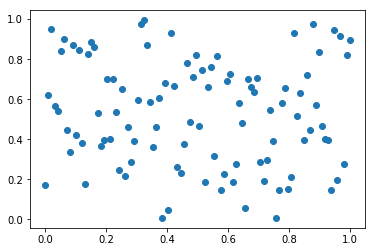

In [68]:
import matplotlib.pyplot as plt

x = np.load("x.npy")
y = np.load("y.npy")

plt.plot(x, y, 'o')

### Using file objects with NPY files

In [69]:
x = np.linspace(0.0, 1.0, 100)
y = np.random.uniform(0.0, 1.0, 100)

with open("xy.dat", "wb") as f:
    np.save(f, x)
    np.save(f, y)

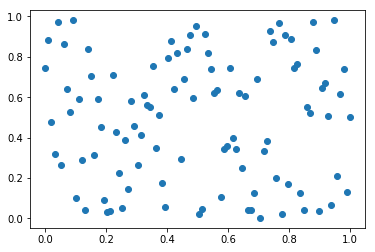

In [70]:
import matplotlib.pyplot as plt

with open("xy.dat", "rb") as f:
    x = np.load(f)
    y = np.load(f)

plt.plot(x, y, 'o')

# Solve equation systems

A common operation in linear algebra and engineering tasks is to be able to solve equation systems of this type


Ax = b

NumPy contains a function for this, **np.linalg()**.

In [71]:
A = np.matrix(
    [[1, 2, 3], 
     [11, 12, 13], 
     [21, 22, 23]]
)

b = np.matrix(
    [[1], 
     [2], 
     [3]])

print(A)
print(b)

x = np.linalg.solve(A, b)

print(x)

[[ 1  2  3]
 [11 12 13]
 [21 22 23]]
[[1]
 [2]
 [3]]
[[ 0.01733746]
 [-0.73467492]
 [ 0.81733746]]
